# Car Model Classification using Vision Transformer

Cloning the git repo

In [1]:
!git clone https://github.com/badri-2004/car-model-classification.git

Cloning into 'car-model-classification'...
remote: Enumerating objects: 17012, done.
remote: Counting objects: 100% (469/469), done.
remote: Compressing objects: 100% (455/455), done.
remote: Total 17012 (delta 32), reused 256 (delta 10), pack-reused 16543
Receiving objects: 100% (17012/17012), 1.81 GiB | 34.94 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Updating files: 100% (16160/16160), done.


running train.py file and training the model for 10 epochs

In [4]:
!python3 car-model-classification/model/train.py

2024-06-21 13:19:43.121470: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-21 13:19:43.121524: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-21 13:19:43.122994: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-21 13:19:43.131052: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-21 13:19:44.421818: W tensorflow/comp

In [5]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
model = torch.load('models/best_model.pth').to(device)

In [ ]:
from transformers import AutoImageProcessor, AutoModelForImageClassification
processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")

Loading necessary Libraries and importing the class_to_idx to convert the predicted token to class

In [56]:
import os
import random
from PIL import Image
import pickle
import matplotlib.pyplot as plt
with open('car-model-classification/class_idx.pkl','rb') as f:
  class_to_idx = pickle.load(f)

In [66]:
def plot_and_pred(n):
  if n>10:
    n = 10
  for i in range(n):
    random_class = random.choice(os.listdir('car-model-classification/car_data/test'))
    random_image_file = random.choice(os.listdir(f'car-model-classification/car_data/test/{random_class}'))
    img_to_predict = Image.open(f'car-model-classification/car_data/test/{random_class}/{random_image_file}')
    input = processor(img_to_predict,return_tensors="pt").to(device)
    output = model(**input)
    logits = output.logits
    predicted_token = torch.argmax(logits,dim =1 ).item()
    predicted_class = list(class_to_idx.keys())[list(class_to_idx.values()).index(predicted_token)]
    plt.figure(figsize=(10,10))
    plt.imshow(img_to_predict)
    plt.axis('off')
    plt.title(f'Actual model : {random_class}, Predicted model : {predicted_class}');
    plt.show()

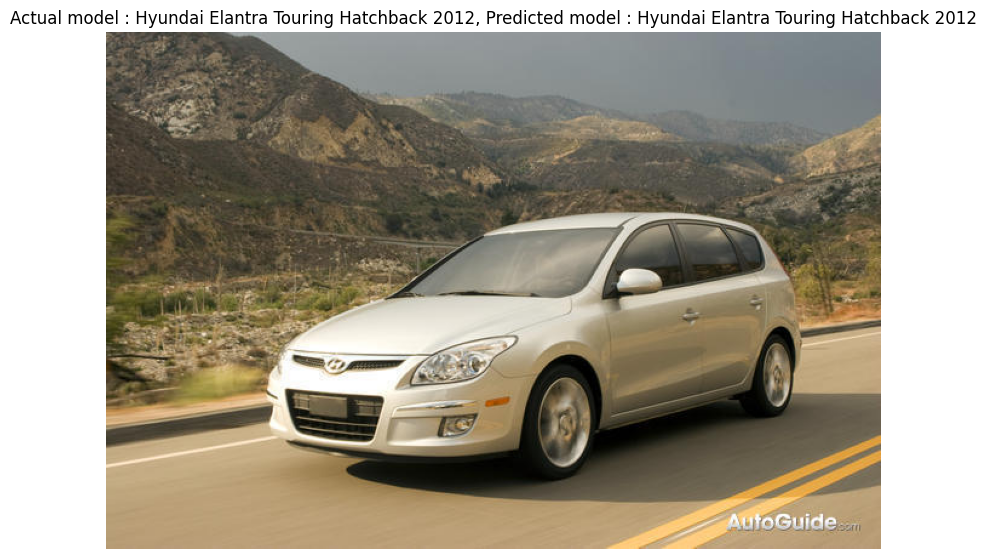

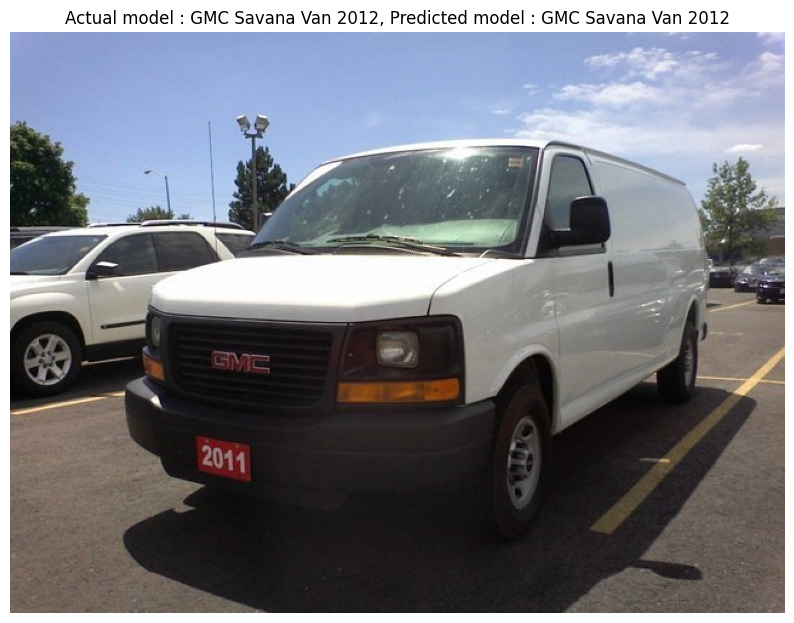

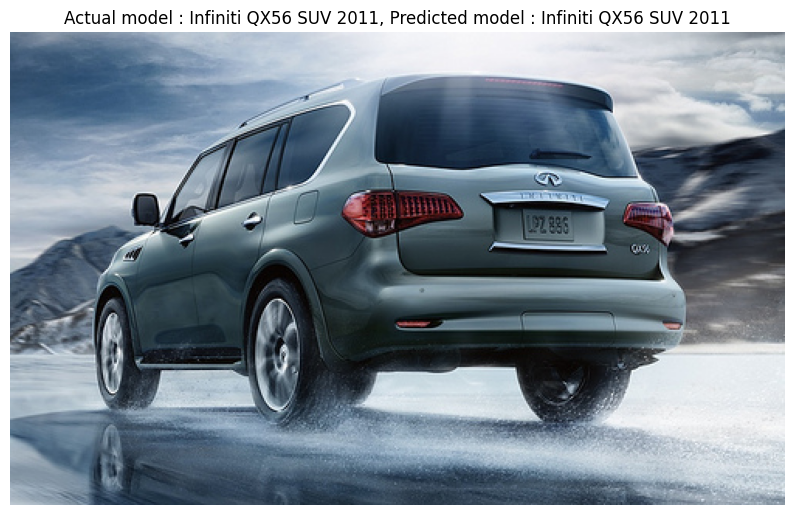

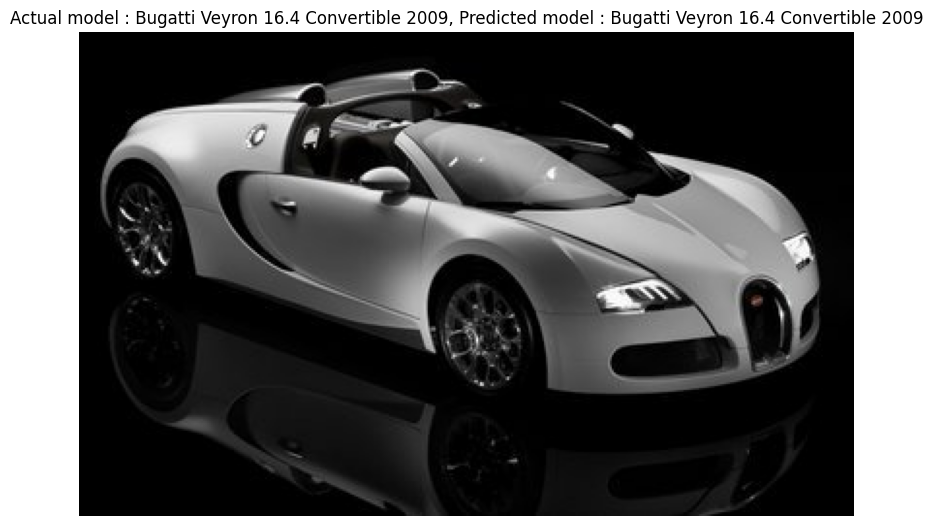

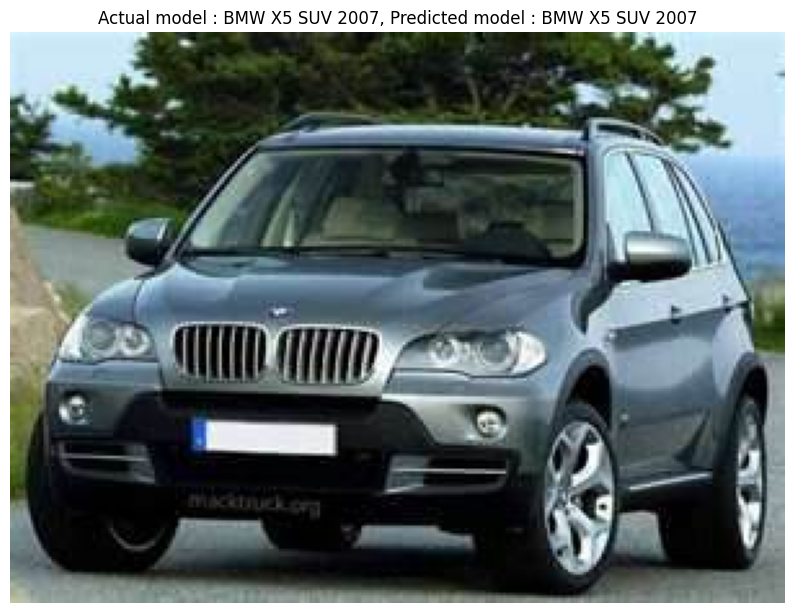

In [65]:
plot_and_pred(5)